# Analysis of the excitation gap in superconducting Gallium 

#### Data sourced from: Heat capacity of Gallium in the normal and superconducting state. [N. Phillips, Phys. Rev. 134, A385 (1964)]
[DOI: https://doi.org/10.1103/PhysRev.134.A385](https://journals.aps.org/pr/abstract/10.1103/PhysRev.134.A385)


In [24]:
import numpy as np  
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy.optimize import curve_fit
import seaborn as sns
%matplotlib inline

In [25]:
f = open("Gallium.dat", "r")
T_sq = []
Cs_T = []
Tc = 1.078
for lines in f:
    if lines[0] == "#":
        continue
    x = str.split(lines)
    T_sq.append(float(x[0]))
    Cs_T.append(float(x[1]))

f.close()


Sommerfield constant (superconductor) =  0.07077220996505429
Sommerfield constant (normal) =  0.596


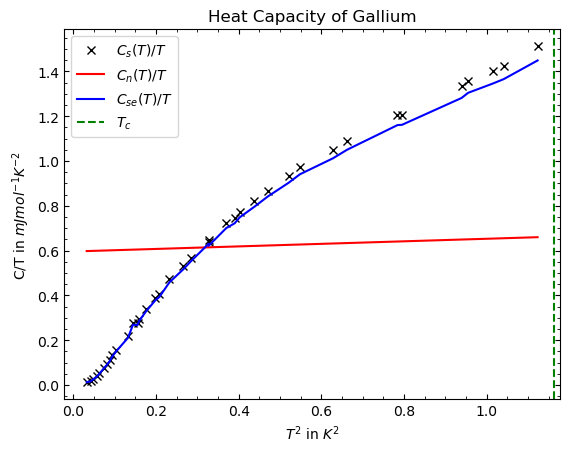

In [48]:
superconductor_heat_capacity = np.array(Cs_T)
temperature = np.array(T_sq)

# var. for normal heat capacity as given in N. Phillips, Phys. Rev. 134, A385 (1964)
normal_heat_capacity = [0.596 + 0.0568*T_sq for T_sq in temperature]
normal_phonon_heat_capacity = [0.0568*T_sq for T_sq in temperature]

# func. for sommerfield constant (electronic contribution to heat capacity)
def f(x, a, b):
    return a + b*x

popt, pcov = curve_fit(f, temperature, superconductor_heat_capacity, p0=[0, 0.5])
print(f"Sommerfield constant (superconductor) = ", popt[0])

popt2 ,pcov2 = curve_fit(f, temperature, normal_heat_capacity, p0=[0, 0.5])
print(f"Sommerfield constant (normal) = ", popt2[0])

# list for electronic heat capacities
# electronic_super_heat_capacity = popt[0]*(np.ones(len(temperature)))
electronic_super_heat_capacity = [superconductor_heat_capacity[i] - normal_phonon_heat_capacity[i] for i in range(len(temperature))]
electronic_normal_heat_capacity = popt2[0]*(np.ones(len(temperature)))

# plotting
plt.plot(temperature, superconductor_heat_capacity, "x", color="black", label=r"$C_{s}(T)/T$")
plt.plot(temperature, normal_heat_capacity, color="red", label=r"$C_{n}(T)/T$")
plt.plot(temperature, electronic_super_heat_capacity, color="blue", label=r"$C_{se}(T)/T$")
# plt.plot(temperature, electronic_normal_heat_capacity, "--", color="blue", label=r"$C_{ne}(T)/T$")
plt.axvline(x=Tc**2, color="green", linestyle="--", label=r"$T_{c}$")

plt.xlabel("$T^{2}$ in $K^{2}$")
plt.ylabel("C/T in $mJ mol^{-1} K^{-2}$")
plt.legend(loc="upper left")
plt.title("Heat Capacity of Gallium")

plt.gca().tick_params(which="both", direction="in", right=True, top=True)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')



The electronic contribution to normal-state heat capacity at T_c =  (0.596, 0.05680000000000002)
[0.65034491 0.67283126 0.68415602 0.69901156 0.70639719 0.72096695
 0.72926647 0.73800675 0.74411658 0.75267008 0.77637536 0.78486563
 0.79212088 0.79464772 0.80422905 0.81673873 0.82178445 0.83307864
 0.84744243 0.85440699 0.86959787 0.86959787 0.88313117 0.88896175
 0.89233568 0.90195374 0.9099389  0.92173211 0.92757187 0.94350663
 0.94974551 0.9700397  0.97173063 0.99216339 0.99426104 1.00186281
 1.00503536 1.0146061 ]
[6.88865233e-04 1.18603288e-03 1.96446418e-03 3.34329236e-03
 4.56400458e-03 7.79647387e-03 1.00923329e-02 1.33548914e-02
 1.66748065e-02 2.12111527e-02 3.70645459e-02 5.08214380e-02
 5.40069085e-02 5.90261558e-02 7.33310990e-02 9.43043319e-02
 1.02508633e-01 1.31166489e-01 1.66987155e-01 1.88799954e-01
 2.44047285e-01 2.40662962e-01 3.02491870e-01 3.26403244e-01
 3.47337900e-01 3.98687853e-01 4.48337794e-01 5.27369066e-01
 5.74247686e-01 6.97551008e-01 7.58367366e-01 9.73

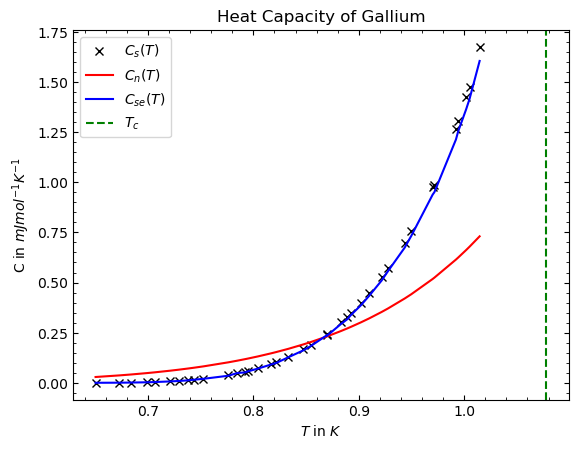

In [59]:
temperature = np.sqrt(temperature)

superconductor_heat_capacity = superconductor_heat_capacity*temperature
normal_heat_capacity = normal_heat_capacity*temperature
electronic_super_heat_capacity = electronic_super_heat_capacity*temperature
electronic_normal_heat_capacity = electronic_normal_heat_capacity*temperature

# plotting
plt.plot(temperature, superconductor_heat_capacity, "x", color="black", label=r"$C_{s}(T)$")
plt.plot(temperature, normal_heat_capacity, color="red", label=r"$C_{n}(T)$")
plt.plot(temperature, electronic_super_heat_capacity, color="blue", label=r"$C_{se}(T)$")
# plt.plot(temperature, electronic_normal_heat_capacity, "--", color="blue", label=r"$C_{ne}(T)$")
plt.axvline(x=Tc, color="green", linestyle="--", label=r"$T_{c}$")

plt.xlabel("$T$ in $K$")
plt.ylabel("C in $mJ mol^{-1} K^{-1}$")
plt.legend(loc="upper left")
plt.title("Heat Capacity of Gallium")

plt.gca().tick_params(which="both", direction="in", right=True, top=True)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')

print("The electronic contribution to normal-state heat capacity at T_c = ", (popt2[0], popt2[1]))
print(temperature)
print(superconductor_heat_capacity)
print(normal_heat_capacity)
print(electronic_super_heat_capacity)

0.6424880000000001


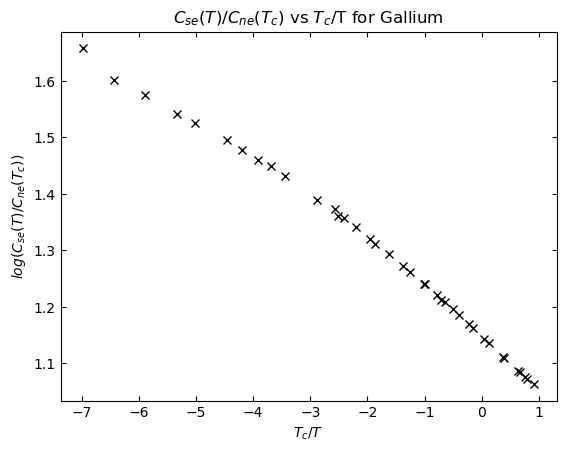

In [60]:
Cse_Cne = electronic_super_heat_capacity/(0.596*Tc)
Tc_T = [Tc/i for i in temperature]

print(0.596*Tc)

log_Cse_Cne = np.log(Cse_Cne)
log_Tc_T = np.log(Tc_T)

plt.plot(log_Cse_Cne, Tc_T, "x", color="black")
plt.xlabel("$T_{c}/T$")
plt.ylabel("$log(C_{se}(T)$/$C_{ne}(T_{c}))$")
plt.title("$C_{se}(T)$/$C_{ne}(T_{c})$ vs $T_{c}$/T for Gallium")

plt.gca().tick_params(which="both", direction="in", right=True, top=True)
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')

plt.show()

The graph above indicates an energy gap in the superconducting state due to the shown exponential property of the function $C_{se}(T)$ (this is shown via a straight line in a logarithmic plot as above). This effectively captues the exponential reduction of free electrons as T $\rightarrow$ 0, hence the excitation gap can be shown via the equation $C_{se}(T)\propto e^{\frac{-E_{g}}{k_{b}T}}$.

In [57]:
# fit y = mx + c to plot above to determine slope
log_Cse_Cne_2 = log_Cse_Cne[0:int(len(log_Cse_Cne)/2)]
Tc_T_2 = Tc_T[0:int(len(Tc_T)/2)]
popt3, pcov3 = curve_fit(f, log_Cse_Cne_2, Tc_T_2, p0=[0, 0.5])

print(f"Slope of the plot = ", popt3[1])

Slope of the plot =  -0.7594134899876299
